## Moisture profile

In [3]:
from pylab import *   
from io import StringIO

In [4]:
with open('atmos_structure.txt', 'r') as file:
        data = file.read()
        
processed_data = data.replace('  ', ',')
processed_data = processed_data.replace('\n','')

data_io = StringIO(processed_data)

arr = np.loadtxt(data_io, delimiter=",", dtype=str)
arr = arr[arr != '"tbf']
arr = arr[arr != '1']
arr = arr[arr != '60']
arr = arr[arr != '']

In [5]:
Z=[] #layer altitude (km)
P=[] #pressure (mb)
T=[] #temperature (K)
H2O=[] #water vapor (g/m3)
O3=[] #ozone (g/m3)

for i in range(len(arr)):
    if i%5==0:
        Z.append(float(arr[i]))
        P.append(float(arr[i+1]))
        T.append(float(arr[i+2]))
        H2O.append(float(arr[i+3]))
        #O3.append(float(arr[i+4]))

In [6]:
#--- Number of different moisture profiles run in sbdart

len(Z)/60

17.0

In [7]:
range=60 #steps to reach 30mb

#--- Set the moisture profiles to be plotted
uw=0.25
uw1=2.0

if uw==0:
    start=0
if uw==0.25:
    start=60
if uw==0.5:
    start=120
press = P[start:start+range]
water = H2O[start:start+range]
temp = T[start:start+range]

if uw1==0.25:
    start=60
if uw1==2.0:
    start=540
press1 = P[start:start+range]
water1 = H2O[start:start+range]
temp1 = T[start:start+range]

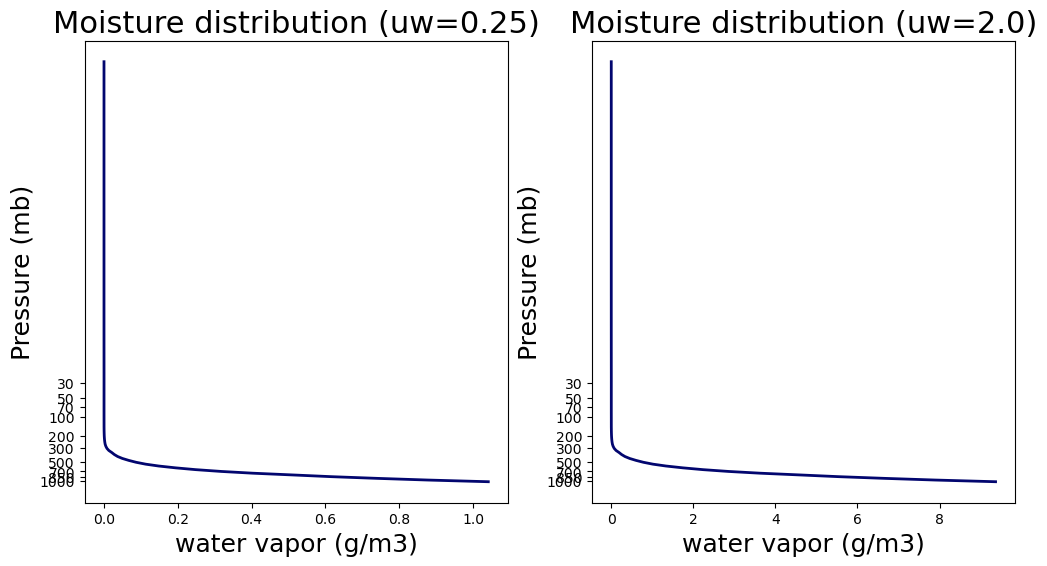

In [8]:
fig,ax=plt.subplots(1, 2, figsize=(12,6))

custom_labels = [1000, 850, 700, 500, 300, 200, 100, 70, 50, 30]


#--- Figure 1
ax[0].set_ylabel("Pressure (mb)", size=18)
ax[0].invert_yaxis()
ax[0].set_yscale("log")
ax[0].minorticks_off()
ax[0].set_yticks([1000, 850, 700, 500, 300, 200, 100, 70, 50, 30])
ax[0].set_yticklabels(custom_labels)

ax[0].set_xlabel("water vapor (g/m3)", size=18)
ax[0].set_title("Moisture distribution (uw="+str(uw)+")", size=22)
ax[0].plot(water, press, c='#02066F', linewidth=2)


#--- Figure 2
ax[1].set_ylabel("Pressure (mb)", size=18)
ax[1].invert_yaxis()
ax[1].set_yscale("log")
ax[1].minorticks_off()
ax[1].set_yticks([1000, 850, 700, 500, 300, 200, 100, 70, 50, 30])
ax[1].set_yticklabels(custom_labels)

ax[1].set_xlabel("water vapor (g/m3)", size=18)
ax[1].set_title("Moisture distribution (uw="+str(uw1)+")", size=22)
ax[1].plot(water1, press1, c='#02066F', linewidth=2)

plt.show()

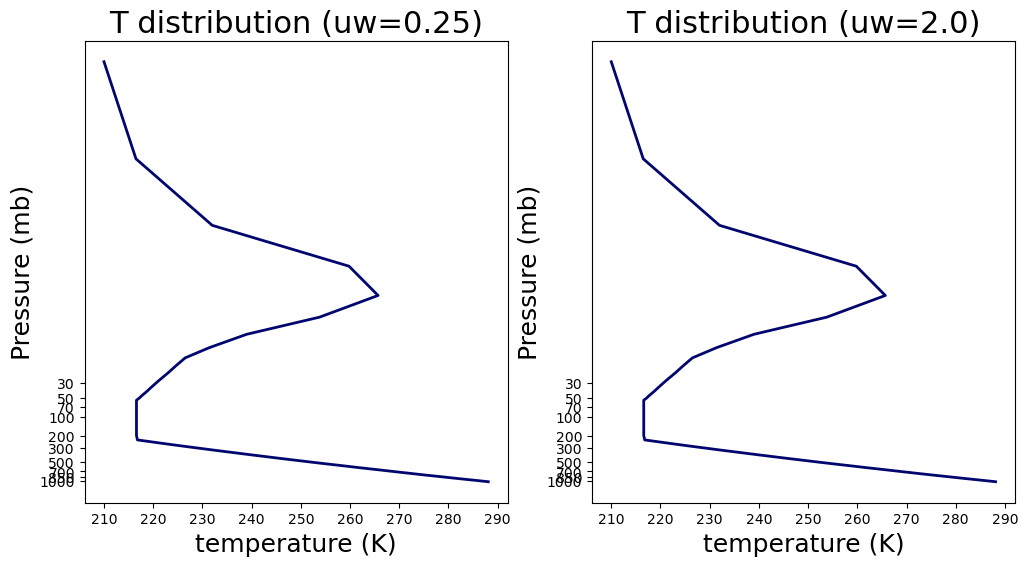

In [9]:
fig,ax=plt.subplots(1, 2, figsize=(12,6))

custom_labels = [1000, 850, 700, 500, 300, 200, 100, 70, 50, 30]


#--- Figure 1
ax[0].set_ylabel("Pressure (mb)", size=18)
ax[0].invert_yaxis()
ax[0].set_yscale("log")
ax[0].minorticks_off()
ax[0].set_yticks([1000, 850, 700, 500, 300, 200, 100, 70, 50, 30])
ax[0].set_yticklabels(custom_labels)

ax[0].set_xlabel("temperature (K)", size=18)
ax[0].set_title("T distribution (uw="+str(uw)+")", size=22)
ax[0].plot(temp, press, c='#02066F', linewidth=2)


#--- Figure 2
ax[1].set_ylabel("Pressure (mb)", size=18)
ax[1].invert_yaxis()
ax[1].set_yscale("log")
ax[1].minorticks_off()
ax[1].set_yticks([1000, 850, 700, 500, 300, 200, 100, 70, 50, 30])
ax[1].set_yticklabels(custom_labels)

ax[1].set_xlabel("temperature (K)", size=18)
ax[1].set_title("T distribution (uw="+str(uw1)+")", size=22)
ax[1].plot(temp1, press, c='#02066F', linewidth=2)

plt.show()